In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
circles = datasets.make_circles()

In [4]:
print(f"features: {circles[0][:10]}")
print(f"target: {circles[1][:10]}")

features: [[ 0.05023242 -0.79842138]
 [ 1.          0.        ]
 [ 0.77486653  0.19895191]
 [ 0.50993919 -0.61641059]
 [ 0.18738131 -0.98228725]
 [ 0.05023242  0.79842138]
 [ 0.9921147   0.12533323]
 [ 0.96858316 -0.24868989]
 [ 0.30901699 -0.95105652]
 [ 0.42866144 -0.67546234]]
target: [1 0 1 1 0 1 0 0 0 1]


In [5]:
from matplotlib.colors import ListedColormap

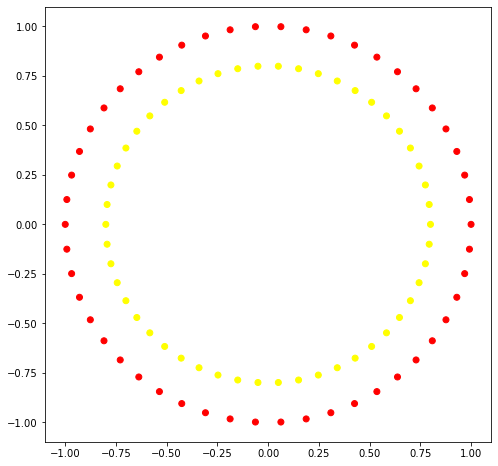

In [8]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize=(8, 8))
pyplot.scatter(list(map(lambda x: x[0], circles[0])), list(map(lambda x: x[1], circles[0])), c=circles[1], cmap=colors)

In [9]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize=(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c=data[1], cmap=colors)

In [12]:
noisy_circles = datasets.make_circles(noise=0.15)

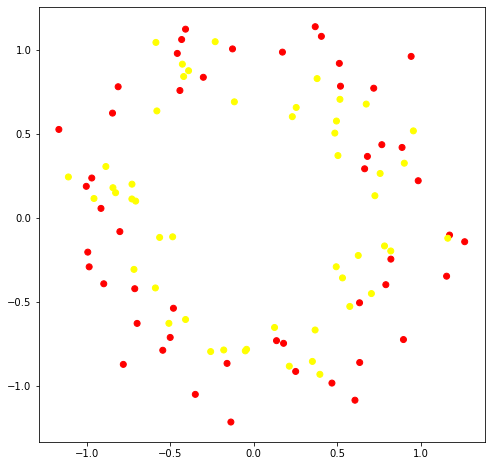

In [13]:
plot_2d_dataset(noisy_circles, colors)

In [14]:
simple_classification_problem = datasets.make_classification(n_features=2, n_informative=1, 
                                                             n_redundant=1, n_clusters_per_class=1,
                                                            random_state=1)

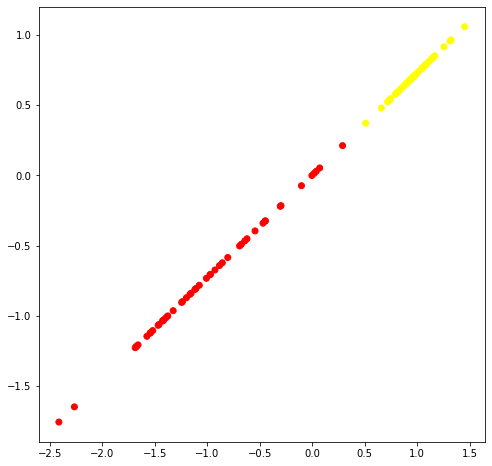

In [15]:
plot_2d_dataset(simple_classification_problem, colors)

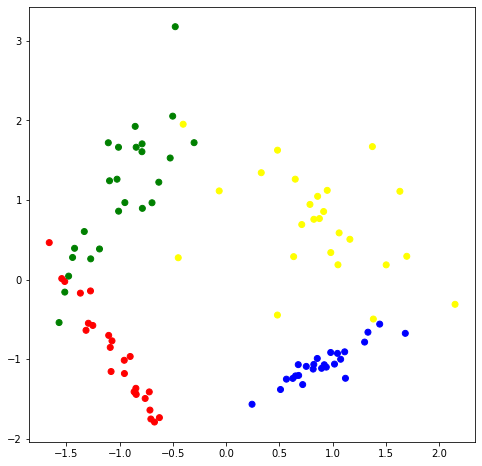

In [16]:
simple_classification_problem = datasets.make_classification(n_features=2, n_informative=2, n_classes=4,
                                                             n_redundant=0, n_clusters_per_class=1,
                                                            random_state=1)
colors = ListedColormap(['red', 'blue', 'green', 'yellow'])
plot_2d_dataset(simple_classification_problem, colors)

In [18]:
iris = datasets.load_iris()

In [19]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
import pandas as pd

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target

In [21]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
iris_df['target'] = iris_df['target'].apply(lambda x: iris.target_names[x])

In [27]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>]], dtype=object)

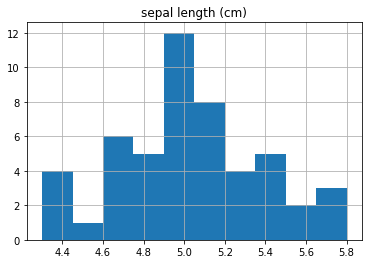

In [29]:
iris_df[iris_df['target'] == 'setosa'].hist('sepal length (cm)')

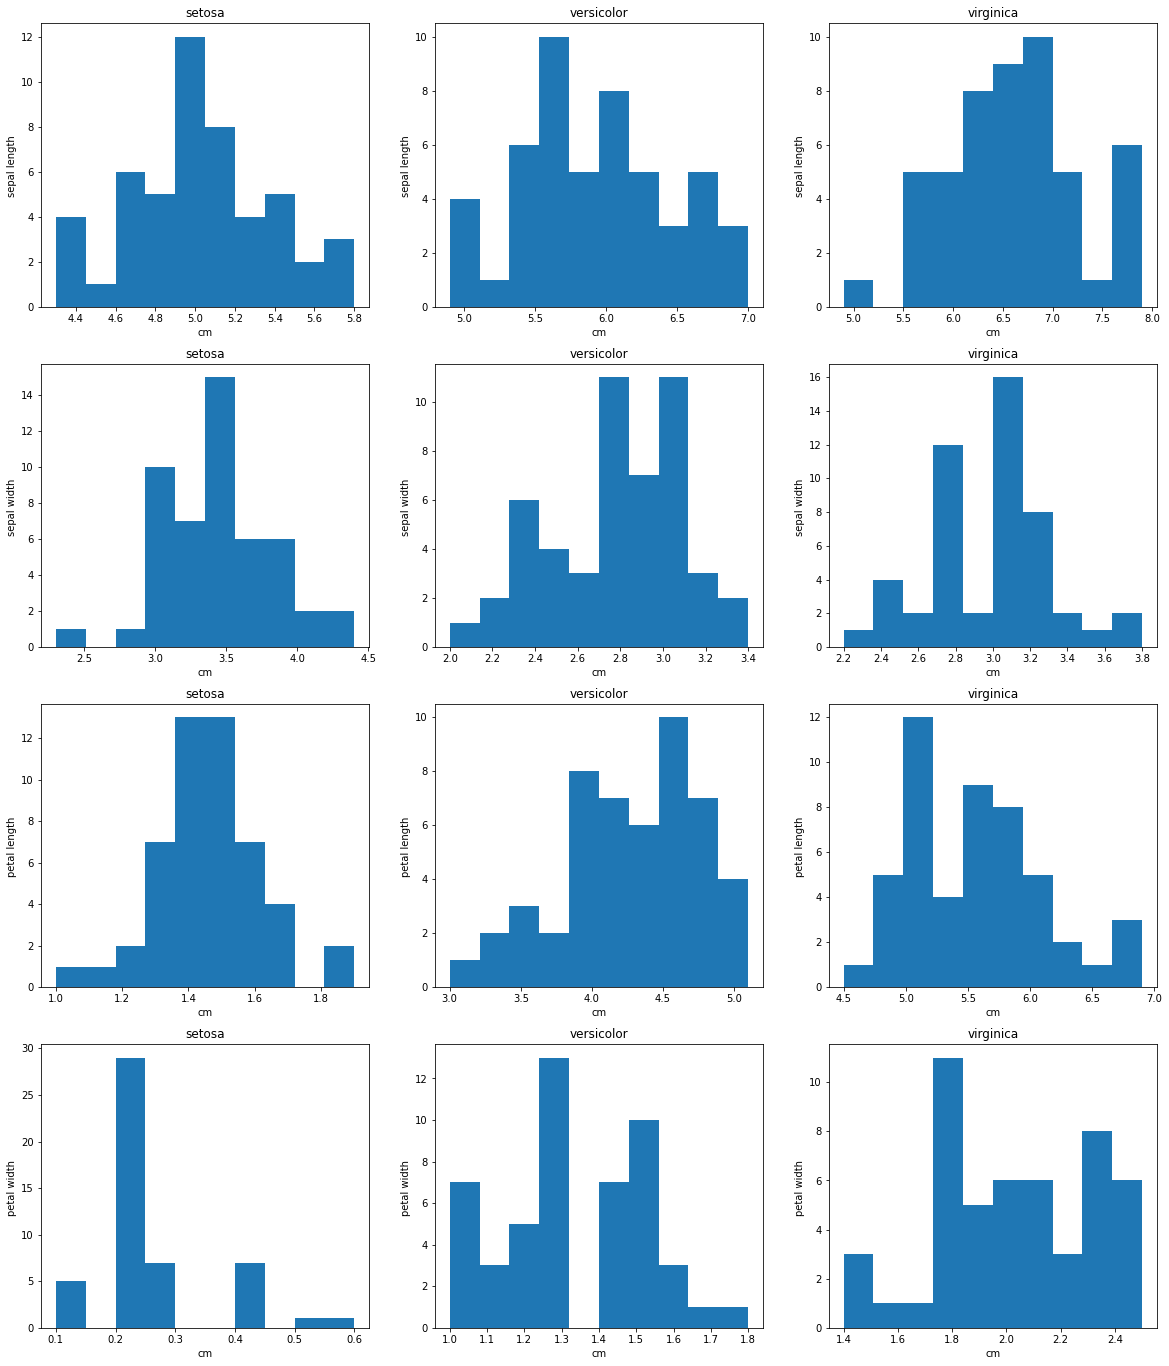

In [31]:
pyplot.figure(figsize = (20,24))

plot_number = 0

for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_df[iris_df['target'] == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

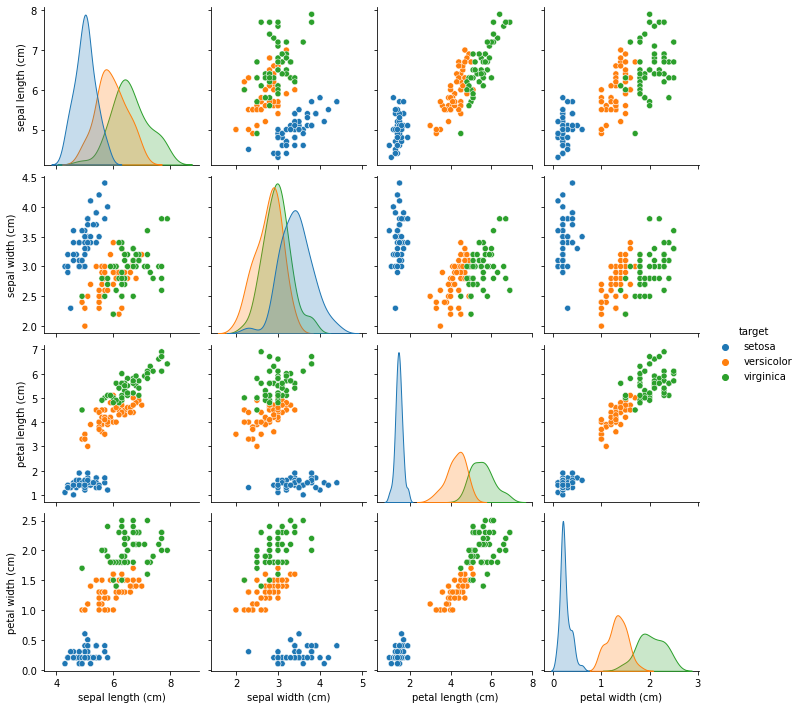

In [33]:
import seaborn as sns
sns.pairplot(iris_df, hue='target')